In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from keras.initializers import he_normal
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils import np_utils 
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:

batch_size = 128
num_classes = 10
epochs = 15
# input image dimensions
img_rows, img_cols = 28, 28

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
#seperating cv data from train data
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.2, random_state=123, stratify=y_train)

In [216]:
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d, %d)"%(x_train.shape[1], x_train.shape[2]))
print("Number of training examples :", x_cv.shape[0], "and each image is of shape (%d, %d)"%(x_cv.shape[1], x_cv.shape[2]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

Number of training examples : 48000 and each image is of shape (28, 28)
Number of training examples : 12000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
#defining train, test and input shape base on image data format of keras
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_cv = x_cv.reshape(x_cv.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_cv = x_cv.reshape(x_cv.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
#normalizing data
x_train = x_train.astype('float32')
x_cv = x_cv.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_cv /= 255
x_test /= 255

In [0]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_cv = np_utils.to_categorical(y_cv, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# Convnet with 3*3 kernel size

**1) Convnet with 3*3 kernel size**

In [0]:
model_a = Sequential()

model_a.add(Conv2D(64, (3,3), activation='relu', input_shape=input_shape, padding='same'))
model_a.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model_a.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model_a.add(MaxPooling2D(pool_size=(2,2)))

model_a.add(Flatten())
model_a.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_a.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_a.add(Dense(num_classes, activation='softmax'))

In [221]:
model_a.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 6272)            

In [0]:
model_a.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
#Performing data augmentation
train_gen = ImageDataGenerator(rotation_range=8, 
                               width_shift_range=0.08, 
                               shear_range=0.3, 
                               height_shift_range=0.08, 
                               zoom_range=0.08 )
cv_gen = ImageDataGenerator()

In [0]:
training_generator= train_gen.flow(x_train, y_train, batch_size=batch_size)
cv_generator= train_gen.flow(x_cv, y_cv, batch_size=batch_size)

In [225]:
history = model_a.fit_generator(
    training_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    validation_data= cv_generator,
    validation_steps=x_cv.shape[0]//batch_size,
    epochs=epochs)

Epoch 1/15
375/375 [==============================] - 29s 79ms/step - loss: 0.2246 - acc: 0.9274 - val_loss: 0.0828 - val_acc: 0.9738
Epoch 2/15
375/375 [==============================] - 26s 68ms/step - loss: 0.0622 - acc: 0.9804 - val_loss: 0.0568 - val_acc: 0.9820
Epoch 3/15
375/375 [==============================] - 26s 68ms/step - loss: 0.0473 - acc: 0.9851 - val_loss: 0.0470 - val_acc: 0.9851
Epoch 4/15
375/375 [==============================] - 25s 68ms/step - loss: 0.0384 - acc: 0.9876 - val_loss: 0.0585 - val_acc: 0.9835
Epoch 5/15
375/375 [==============================] - 26s 68ms/step - loss: 0.0327 - acc: 0.9898 - val_loss: 0.0310 - val_acc: 0.9910
Epoch 6/15
375/375 [==============================] - 26s 68ms/step - loss: 0.0294 - acc: 0.9907 - val_loss: 0.0404 - val_acc: 0.9891
Epoch 7/15
375/375 [==============================] - 26s 68ms/step - loss: 0.0275 - acc: 0.9912 - val_loss: 0.0331 - val_acc: 0.9901
Epoch 8/15
375/375 [==============================] - 26s 68ms

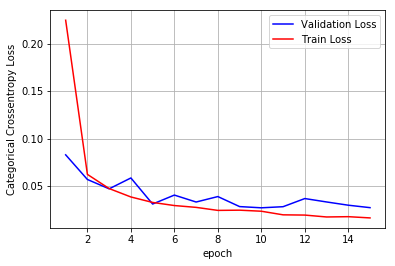

In [226]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [227]:
model_a_score = model_a.evaluate(x_test, y_test, verbose=0)
print('Test score:', model_a_score[0]) 
print('Test accuracy:', model_a_score[1])

Test score: 0.02215424347009457
Test accuracy: 0.9936


**2) Convnet with 3*3 kernel size with dropout in dense as well as convolution layers**

In [0]:
model_b = Sequential()

model_b.add(Conv2D(64, (3,3), activation='relu', input_shape=input_shape, padding='same'))
model_b.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_b.add(MaxPooling2D(pool_size=(2, 2)))
model_b.add(Dropout(0.5))

model_b.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model_b.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model_b.add(MaxPooling2D(pool_size=(2,2)))
model_b.add(Dropout(0.5))

model_b.add(Flatten())
model_b.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_b.add(BatchNormalization())
model_b.add(Dropout(0.5))

model_b.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_b.add(BatchNormalization())
model_b.add(Dropout(0.5))

model_b.add(Dense(num_classes, activation='softmax'))

In [229]:
model_b.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 7, 7, 128)       

In [0]:
model_b.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [231]:
history = model_b.fit_generator(
    training_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    validation_data= cv_generator,
    validation_steps=x_cv.shape[0]//batch_size,
    epochs=epochs)

Epoch 1/15
375/375 [==============================] - 32s 87ms/step - loss: 0.6574 - acc: 0.7961 - val_loss: 0.1021 - val_acc: 0.9682
Epoch 2/15
375/375 [==============================] - 28s 75ms/step - loss: 0.1738 - acc: 0.9485 - val_loss: 0.0650 - val_acc: 0.9809
Epoch 3/15
375/375 [==============================] - 28s 74ms/step - loss: 0.1265 - acc: 0.9621 - val_loss: 0.0549 - val_acc: 0.9832
Epoch 4/15
375/375 [==============================] - 28s 74ms/step - loss: 0.0996 - acc: 0.9705 - val_loss: 0.0631 - val_acc: 0.9813
Epoch 5/15
375/375 [==============================] - 27s 73ms/step - loss: 0.0886 - acc: 0.9748 - val_loss: 0.0474 - val_acc: 0.9859
Epoch 6/15
375/375 [==============================] - 28s 74ms/step - loss: 0.0803 - acc: 0.9761 - val_loss: 0.0370 - val_acc: 0.9883
Epoch 7/15
375/375 [==============================] - 28s 74ms/step - loss: 0.0756 - acc: 0.9776 - val_loss: 0.0540 - val_acc: 0.9847
Epoch 8/15
375/375 [==============================] - 28s 75ms

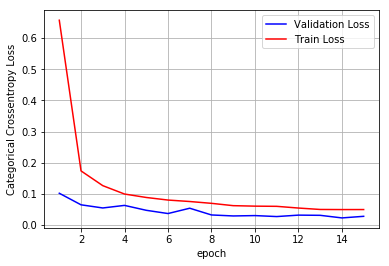

In [232]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [233]:
model_b_score = model_b.evaluate(x_test, y_test, verbose=0)
print('Test score:', model_b_score[0]) 
print('Test accuracy:', model_b_score[1])

Test score: 0.01806922753486506
Test accuracy: 0.9951


**3) Convnet with 3*3 kernel size with dropout in dense layers only**

In [0]:
model_c = Sequential()

model_c.add(Conv2D(64, (3,3), activation='relu', input_shape=input_shape, padding='same'))
model_c.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_c.add(MaxPooling2D(pool_size=(2, 2)))

model_c.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model_c.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model_c.add(MaxPooling2D(pool_size=(2,2)))

model_c.add(Flatten())
model_c.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_c.add(BatchNormalization())
model_c.add(Dropout(0.5))

model_c.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_c.add(BatchNormalization())
model_c.add(Dropout(0.5))

model_c.add(Dense(num_classes, activation='softmax'))

In [235]:
model_c.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 6272)            

In [0]:
model_c.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [237]:
history = model_c.fit_generator(
    training_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    validation_data= cv_generator,
    validation_steps=x_cv.shape[0]//batch_size,
    epochs=epochs)

Epoch 1/15
375/375 [==============================] - 32s 85ms/step - loss: 0.3709 - acc: 0.8864 - val_loss: 0.1033 - val_acc: 0.9689
Epoch 2/15
375/375 [==============================] - 27s 73ms/step - loss: 0.1054 - acc: 0.9693 - val_loss: 0.1842 - val_acc: 0.9477
Epoch 3/15
375/375 [==============================] - 28s 73ms/step - loss: 0.0760 - acc: 0.9778 - val_loss: 0.0500 - val_acc: 0.9862
Epoch 4/15
375/375 [==============================] - 27s 73ms/step - loss: 0.0615 - acc: 0.9819 - val_loss: 0.0433 - val_acc: 0.9874
Epoch 5/15
375/375 [==============================] - 27s 73ms/step - loss: 0.0577 - acc: 0.9830 - val_loss: 0.0414 - val_acc: 0.9870
Epoch 6/15
375/375 [==============================] - 27s 73ms/step - loss: 0.0484 - acc: 0.9859 - val_loss: 0.0427 - val_acc: 0.9869
Epoch 7/15
375/375 [==============================] - 28s 74ms/step - loss: 0.0461 - acc: 0.9867 - val_loss: 0.0341 - val_acc: 0.9904
Epoch 8/15
375/375 [==============================] - 27s 73ms

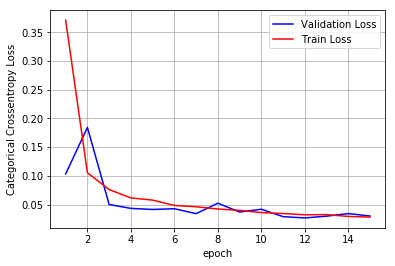

In [238]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [239]:
model_c_score = model_c.evaluate(x_test, y_test, verbose=0)
print('Test score:', model_c_score[0]) 
print('Test accuracy:', model_c_score[1])

Test score: 0.019041191640232866
Test accuracy: 0.9948


**4) Convnet with 3*3 kernel size with more no. of convolution layers**

In [0]:
model_d = Sequential()

model_d.add(Conv2D(64, (3,3), activation='relu', input_shape=input_shape, padding='same'))
model_d.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_d.add(MaxPooling2D(pool_size=(2, 2)))

model_d.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model_d.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model_d.add(MaxPooling2D(pool_size=(2,2)))

model_d.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model_d.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model_d.add(MaxPooling2D(pool_size=(2,2)))

model_d.add(Flatten())
model_d.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_d.add(BatchNormalization())
model_d.add(Dropout(0.5))

model_d.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_d.add(BatchNormalization())
model_d.add(Dropout(0.5))

model_d.add(Dense(num_classes, activation='softmax'))

In [241]:
model_d.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 7, 7, 256)       

In [0]:
model_d.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [243]:
history = model_d.fit_generator(
    training_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    validation_data= cv_generator,
    validation_steps=x_cv.shape[0]//batch_size,
    epochs=epochs)

Epoch 1/15
375/375 [==============================] - 35s 92ms/step - loss: 0.3510 - acc: 0.8931 - val_loss: 0.4977 - val_acc: 0.8568
Epoch 2/15
375/375 [==============================] - 29s 78ms/step - loss: 0.0914 - acc: 0.9731 - val_loss: 0.1430 - val_acc: 0.9566
Epoch 3/15
375/375 [==============================] - 29s 78ms/step - loss: 0.0649 - acc: 0.9815 - val_loss: 0.0920 - val_acc: 0.9730
Epoch 4/15
375/375 [==============================] - 30s 79ms/step - loss: 0.0533 - acc: 0.9840 - val_loss: 0.0574 - val_acc: 0.9832
Epoch 5/15
375/375 [==============================] - 30s 81ms/step - loss: 0.0493 - acc: 0.9854 - val_loss: 0.0710 - val_acc: 0.9798
Epoch 6/15
375/375 [==============================] - 30s 81ms/step - loss: 0.0441 - acc: 0.9868 - val_loss: 0.0660 - val_acc: 0.9814
Epoch 7/15
375/375 [==============================] - 30s 80ms/step - loss: 0.0398 - acc: 0.9884 - val_loss: 0.0449 - val_acc: 0.9874
Epoch 8/15
375/375 [==============================] - 30s 80ms

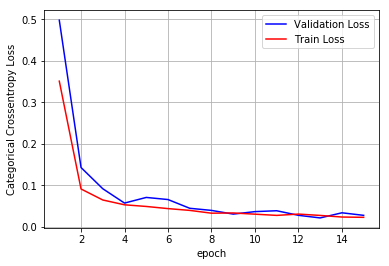

In [244]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [245]:
model_d_score = model_d.evaluate(x_test, y_test, verbose=0)
print('Test score:', model_d_score[0]) 
print('Test accuracy:', model_d_score[1])

Test score: 0.019454195042738136
Test accuracy: 0.9935


# Convnet with 5*5 kernel size

**1) Convnet with 5*5 kernel size**

In [0]:
model_e = Sequential()

model_e.add(Conv2D(64, (5,5), activation='relu', input_shape=input_shape, padding='same'))
model_e.add(Conv2D(64, (5,5), activation='relu', padding='same'))
model_e.add(MaxPooling2D(pool_size=(2, 2)))

model_e.add(Conv2D(128, (5,5), activation='relu', padding='same'))
model_e.add(Conv2D(128, (5,5), activation='relu', padding='same'))
model_e.add(MaxPooling2D(pool_size=(2,2)))

model_e.add(Flatten())
model_e.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_e.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_e.add(Dense(num_classes, activation='softmax'))

In [247]:
model_e.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 28, 28, 64)        102464    
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 14, 14, 128)       204928    
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 14, 14, 128)       409728    
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 6272)            

In [0]:
model_e.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [249]:
history = model_e.fit_generator(
    training_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    validation_data= cv_generator,
    validation_steps=x_cv.shape[0]//batch_size,
    epochs=epochs)

Epoch 1/15
375/375 [==============================] - 33s 87ms/step - loss: 0.2075 - acc: 0.9327 - val_loss: 0.0827 - val_acc: 0.9747
Epoch 2/15
375/375 [==============================] - 28s 74ms/step - loss: 0.0609 - acc: 0.9812 - val_loss: 0.0395 - val_acc: 0.9892
Epoch 3/15
375/375 [==============================] - 28s 74ms/step - loss: 0.0420 - acc: 0.9871 - val_loss: 0.0440 - val_acc: 0.9868
Epoch 4/15
375/375 [==============================] - 28s 75ms/step - loss: 0.0361 - acc: 0.9887 - val_loss: 0.0398 - val_acc: 0.9886
Epoch 5/15
375/375 [==============================] - 28s 75ms/step - loss: 0.0325 - acc: 0.9901 - val_loss: 0.0365 - val_acc: 0.9892
Epoch 6/15
375/375 [==============================] - 28s 75ms/step - loss: 0.0299 - acc: 0.9905 - val_loss: 0.0248 - val_acc: 0.9936
Epoch 7/15
375/375 [==============================] - 28s 75ms/step - loss: 0.0252 - acc: 0.9920 - val_loss: 0.0340 - val_acc: 0.9897
Epoch 8/15
375/375 [==============================] - 28s 74ms

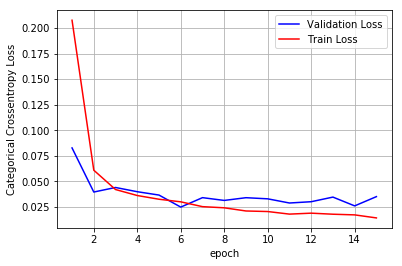

In [250]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [251]:
model_e_score = model_e.evaluate(x_test, y_test, verbose=0)
print('Test score:', model_e_score[0]) 
print('Test accuracy:', model_e_score[1])

Test score: 0.024636892917430396
Test accuracy: 0.9937


**2) Convnet with 5*5 kernel size with droput in convolution and dense layers**

In [0]:
model_f = Sequential()

model_f.add(Conv2D(64, (5,5), activation='relu', input_shape=input_shape, padding='same'))
model_f.add(Conv2D(64, (5,5), activation='relu', padding='same'))
model_f.add(MaxPooling2D(pool_size=(2, 2)))
model_f.add(Dropout(0.5))

model_f.add(Conv2D(128, (5,5), activation='relu', padding='same'))
model_f.add(Conv2D(128, (5,5), activation='relu', padding='same'))
model_f.add(MaxPooling2D(pool_size=(2,2)))
model_f.add(Dropout(0.5))

model_f.add(Flatten())
model_f.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_f.add(BatchNormalization())
model_f.add(Dropout(0.5))

model_f.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_f.add(BatchNormalization())
model_f.add(Dropout(0.5))

model_f.add(Dense(num_classes, activation='softmax'))

In [253]:
model_f.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 28, 28, 64)        102464    
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 14, 14, 128)       204928    
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 14, 14, 128)       409728    
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 7, 7, 128)       

In [0]:
model_f.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [255]:
history = model_f.fit_generator(
    training_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    validation_data= cv_generator,
    validation_steps=x_cv.shape[0]//batch_size,
    epochs=epochs)

Epoch 1/15
375/375 [==============================] - 35s 94ms/step - loss: 0.6533 - acc: 0.8046 - val_loss: 0.1165 - val_acc: 0.9642
Epoch 2/15
375/375 [==============================] - 30s 79ms/step - loss: 0.1303 - acc: 0.9627 - val_loss: 0.0629 - val_acc: 0.9817
Epoch 3/15
375/375 [==============================] - 30s 79ms/step - loss: 0.0942 - acc: 0.9735 - val_loss: 0.0509 - val_acc: 0.9859
Epoch 4/15
375/375 [==============================] - 30s 79ms/step - loss: 0.0767 - acc: 0.9780 - val_loss: 0.0443 - val_acc: 0.9884
Epoch 5/15
375/375 [==============================] - 29s 77ms/step - loss: 0.0656 - acc: 0.9805 - val_loss: 0.0397 - val_acc: 0.9898
Epoch 6/15
375/375 [==============================] - 29s 78ms/step - loss: 0.0615 - acc: 0.9825 - val_loss: 0.0355 - val_acc: 0.9902
Epoch 7/15
375/375 [==============================] - 29s 78ms/step - loss: 0.0562 - acc: 0.9835 - val_loss: 0.0368 - val_acc: 0.9896
Epoch 8/15
375/375 [==============================] - 29s 78ms

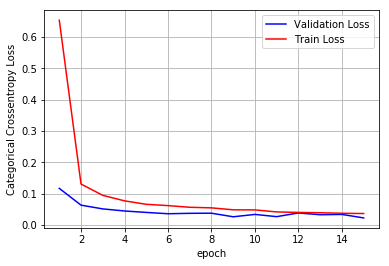

In [256]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [257]:
model_f_score = model_f.evaluate(x_test, y_test, verbose=0)
print('Test score:', model_f_score[0]) 
print('Test accuracy:', model_f_score[1])

Test score: 0.017181302371390483
Test accuracy: 0.9943


**3) Convnet with 5*5 kernel size with droput in dense layers**

In [0]:
model_g = Sequential()

model_g.add(Conv2D(64, (5,5), activation='relu', input_shape=input_shape, padding='same'))
model_g.add(Conv2D(64, (5,5), activation='relu', padding='same'))
model_g.add(MaxPooling2D(pool_size=(2, 2)))

model_g.add(Conv2D(128, (5,5), activation='relu', padding='same'))
model_g.add(Conv2D(128, (5,5), activation='relu', padding='same'))
model_g.add(MaxPooling2D(pool_size=(2,2)))

model_g.add(Flatten())
model_g.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_g.add(BatchNormalization())
model_g.add(Dropout(0.5))

model_g.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_g.add(BatchNormalization())
model_g.add(Dropout(0.5))

model_g.add(Dense(num_classes, activation='softmax'))

In [259]:
model_g.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 28, 28, 64)        102464    
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 14, 14, 128)       204928    
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 14, 14, 128)       409728    
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 6272)            

In [0]:
model_g.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [261]:
history = model_g.fit_generator(
    training_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    validation_data= cv_generator,
    validation_steps=x_cv.shape[0]//batch_size,
    epochs=epochs)

Epoch 1/15
375/375 [==============================] - 35s 93ms/step - loss: 0.3813 - acc: 0.8848 - val_loss: 0.0920 - val_acc: 0.9710
Epoch 2/15
375/375 [==============================] - 29s 78ms/step - loss: 0.0857 - acc: 0.9757 - val_loss: 0.0491 - val_acc: 0.9862
Epoch 3/15
375/375 [==============================] - 29s 78ms/step - loss: 0.0640 - acc: 0.9814 - val_loss: 0.0434 - val_acc: 0.9875
Epoch 4/15
375/375 [==============================] - 29s 77ms/step - loss: 0.0534 - acc: 0.9844 - val_loss: 0.0397 - val_acc: 0.9896
Epoch 5/15
375/375 [==============================] - 29s 77ms/step - loss: 0.0471 - acc: 0.9867 - val_loss: 0.0386 - val_acc: 0.9887
Epoch 6/15
375/375 [==============================] - 29s 78ms/step - loss: 0.0394 - acc: 0.9880 - val_loss: 0.0397 - val_acc: 0.9876
Epoch 7/15
375/375 [==============================] - 29s 78ms/step - loss: 0.0343 - acc: 0.9901 - val_loss: 0.0361 - val_acc: 0.9902
Epoch 8/15
375/375 [==============================] - 29s 78ms

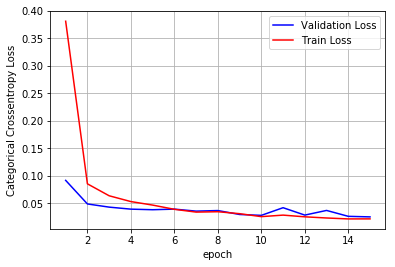

In [262]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [263]:
model_g_score = model_g.evaluate(x_test, y_test, verbose=0)
print('Test score:', model_g_score[0]) 
print('Test accuracy:', model_g_score[1])

Test score: 0.01227449049837087
Test accuracy: 0.9967


**4) Convnet with 5*5 kernel size with more no. of convolution and pooling layers**

In [0]:
model_h = Sequential()

model_h.add(Conv2D(64, (5,5), activation='relu', input_shape=input_shape, padding='same'))
model_h.add(Conv2D(64, (5,5), activation='relu', padding='same'))
model_h.add(MaxPooling2D(pool_size=(2, 2)))

model_h.add(Conv2D(128, (5,5), activation='relu', padding='same'))
model_h.add(Conv2D(128, (5,5), activation='relu', padding='same'))
model_h.add(MaxPooling2D(pool_size=(2,2)))

model_h.add(Conv2D(256, (5,5), activation='relu', padding='same'))
model_h.add(Conv2D(256, (5,5), activation='relu', padding='same'))
model_h.add(MaxPooling2D(pool_size=(2,2)))

model_h.add(Flatten())
model_h.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_h.add(BatchNormalization())
model_h.add(Dropout(0.5))

model_h.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_h.add(BatchNormalization())
model_h.add(Dropout(0.5))

model_h.add(Dense(num_classes, activation='softmax'))

In [265]:
model_h.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 28, 28, 64)        102464    
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 14, 14, 128)       204928    
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 14, 14, 128)       409728    
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 7, 7, 256)       

In [0]:
model_h.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [267]:
history = model_h.fit_generator(
    training_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    validation_data= cv_generator,
    validation_steps=x_cv.shape[0]//batch_size,
    epochs=epochs)

Epoch 1/15
375/375 [==============================] - 47s 125ms/step - loss: 0.5344 - acc: 0.8352 - val_loss: 0.1142 - val_acc: 0.9663
Epoch 2/15
375/375 [==============================] - 40s 108ms/step - loss: 0.0869 - acc: 0.9762 - val_loss: 0.0826 - val_acc: 0.9775
Epoch 3/15
375/375 [==============================] - 40s 107ms/step - loss: 0.0640 - acc: 0.9822 - val_loss: 0.0603 - val_acc: 0.9852
Epoch 4/15
375/375 [==============================] - 40s 107ms/step - loss: 0.0490 - acc: 0.9863 - val_loss: 0.0401 - val_acc: 0.9896
Epoch 5/15
375/375 [==============================] - 41s 110ms/step - loss: 0.0434 - acc: 0.9875 - val_loss: 0.0472 - val_acc: 0.9856
Epoch 6/15
375/375 [==============================] - 41s 110ms/step - loss: 0.0413 - acc: 0.9885 - val_loss: 0.0498 - val_acc: 0.9872
Epoch 7/15
375/375 [==============================] - 41s 110ms/step - loss: 0.0357 - acc: 0.9901 - val_loss: 0.0537 - val_acc: 0.9864
Epoch 8/15
375/375 [==============================] - 4

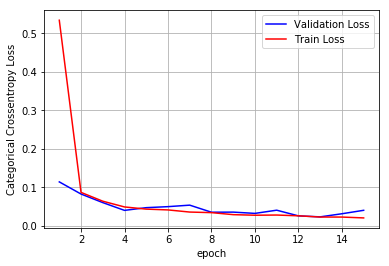

In [268]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [269]:
model_h_score = model_h.evaluate(x_test, y_test, verbose=0)
print('Test score:', model_h_score[0]) 
print('Test accuracy:', model_h_score[1])

Test score: 0.04808743756932236
Test accuracy: 0.9891


# Convnet with 7*7 kernel size

**1) ConveNet wit 7*7 kernel size**

In [0]:
model_i = Sequential()

model_i.add(Conv2D(64, (7,7), activation='relu', input_shape=input_shape, padding='same'))
model_i.add(Conv2D(64, (7,7), activation='relu', padding='same'))
model_i.add(MaxPooling2D(pool_size=(2, 2)))

model_i.add(Conv2D(128, (7,7), activation='relu', padding='same'))
model_i.add(Conv2D(128, (7,7), activation='relu', padding='same'))
model_i.add(MaxPooling2D(pool_size=(2,2)))

model_i.add(Flatten())
model_i.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_i.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_i.add(Dense(num_classes, activation='softmax'))

In [271]:
model_i.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_119 (Conv2D)          (None, 28, 28, 64)        3200      
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 28, 28, 64)        200768    
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 14, 14, 128)       401536    
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 14, 14, 128)       802944    
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 6272)            

In [0]:
model_i.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [273]:
history = model_i.fit_generator(
    training_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    validation_data= cv_generator,
    validation_steps=x_cv.shape[0]//batch_size,
    epochs=epochs)

Epoch 1/15
375/375 [==============================] - 44s 118ms/step - loss: 0.3096 - acc: 0.8951 - val_loss: 0.0828 - val_acc: 0.9756
Epoch 2/15
375/375 [==============================] - 38s 101ms/step - loss: 0.0678 - acc: 0.9797 - val_loss: 0.0595 - val_acc: 0.9822
Epoch 3/15
375/375 [==============================] - 38s 101ms/step - loss: 0.0517 - acc: 0.9843 - val_loss: 0.0550 - val_acc: 0.9839
Epoch 4/15
375/375 [==============================] - 38s 101ms/step - loss: 0.0391 - acc: 0.9881 - val_loss: 0.0514 - val_acc: 0.9853
Epoch 5/15
375/375 [==============================] - 38s 101ms/step - loss: 0.0370 - acc: 0.9887 - val_loss: 0.0377 - val_acc: 0.9898
Epoch 6/15
375/375 [==============================] - 38s 100ms/step - loss: 0.0319 - acc: 0.9897 - val_loss: 0.0479 - val_acc: 0.9864
Epoch 7/15
375/375 [==============================] - 38s 101ms/step - loss: 0.0292 - acc: 0.9912 - val_loss: 0.0423 - val_acc: 0.9886
Epoch 8/15
375/375 [==============================] - 3

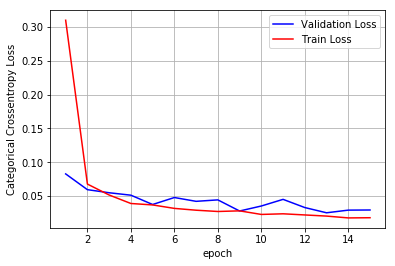

In [274]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [275]:
model_i_score = model_i.evaluate(x_test, y_test, verbose=0)
print('Test score:', model_i_score[0]) 
print('Test accuracy:', model_i_score[1])

Test score: 0.01677764115408754
Test accuracy: 0.9943


**2) ConvNet with 7*7 kernel and dropout in both convolution and dense layers**

In [0]:
model_j = Sequential()

model_j.add(Conv2D(64, (7,7), activation='relu', input_shape=input_shape, padding='same'))
model_j.add(Conv2D(64, (7,7), activation='relu', padding='same'))
model_j.add(MaxPooling2D(pool_size=(2, 2)))
model_j.add(Dropout(0.5))

model_j.add(Conv2D(128, (7,7), activation='relu', padding='same'))
model_j.add(Conv2D(128, (7,7), activation='relu', padding='same'))
model_j.add(MaxPooling2D(pool_size=(2,2)))
model_j.add(Dropout(0.5))

model_j.add(Flatten())
model_j.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_j.add(BatchNormalization())
model_j.add(Dropout(0.5))

model_j.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_j.add(BatchNormalization())
model_j.add(Dropout(0.5))

model_j.add(Dense(num_classes, activation='softmax'))

In [277]:
model_j.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_123 (Conv2D)          (None, 28, 28, 64)        3200      
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 28, 28, 64)        200768    
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 14, 14, 128)       401536    
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 14, 14, 128)       802944    
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 7, 7, 128)       

In [0]:
model_j.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [279]:
history = model_j.fit_generator(
    training_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    validation_data= cv_generator,
    validation_steps=x_cv.shape[0]//batch_size,
    epochs=epochs)

Epoch 1/15
375/375 [==============================] - 51s 135ms/step - loss: 0.6743 - acc: 0.7967 - val_loss: 0.1775 - val_acc: 0.9441
Epoch 2/15
375/375 [==============================] - 42s 113ms/step - loss: 0.1171 - acc: 0.9670 - val_loss: 0.0558 - val_acc: 0.9832
Epoch 3/15
375/375 [==============================] - 43s 114ms/step - loss: 0.0818 - acc: 0.9772 - val_loss: 0.0441 - val_acc: 0.9860
Epoch 4/15
375/375 [==============================] - 43s 114ms/step - loss: 0.0680 - acc: 0.9809 - val_loss: 0.0577 - val_acc: 0.9837
Epoch 5/15
375/375 [==============================] - 42s 113ms/step - loss: 0.0600 - acc: 0.9833 - val_loss: 0.0302 - val_acc: 0.9915
Epoch 6/15
375/375 [==============================] - 42s 113ms/step - loss: 0.0557 - acc: 0.9839 - val_loss: 0.0406 - val_acc: 0.9892
Epoch 7/15
375/375 [==============================] - 43s 114ms/step - loss: 0.0454 - acc: 0.9871 - val_loss: 0.0303 - val_acc: 0.9913
Epoch 8/15
375/375 [==============================] - 4

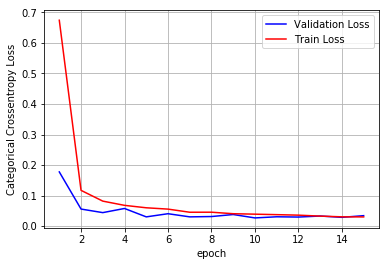

In [280]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [281]:
model_j_score = model_j.evaluate(x_test, y_test, verbose=0)
print('Test score:', model_j_score[0]) 
print('Test accuracy:', model_j_score[1])

Test score: 0.025811030476922316
Test accuracy: 0.9933


**3) ConvNet with 7*7 kernel size and dropout in dense layers**

In [0]:
model_k = Sequential()

model_k.add(Conv2D(64, (7,7), activation='relu', input_shape=input_shape, padding='same'))
model_k.add(Conv2D(64, (7,7), activation='relu', padding='same'))
model_k.add(MaxPooling2D(pool_size=(2, 2)))

model_k.add(Conv2D(128, (7,7), activation='relu', padding='same'))
model_k.add(Conv2D(128, (7,7), activation='relu', padding='same'))
model_k.add(MaxPooling2D(pool_size=(2,2)))

model_k.add(Flatten())
model_k.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_k.add(BatchNormalization())
model_k.add(Dropout(0.5))

model_k.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_k.add(BatchNormalization())
model_k.add(Dropout(0.5))

model_k.add(Dense(num_classes, activation='softmax'))

In [283]:
model_k.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_127 (Conv2D)          (None, 28, 28, 64)        3200      
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 28, 28, 64)        200768    
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 14, 14, 128)       401536    
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 14, 14, 128)       802944    
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 6272)            

In [0]:
model_k.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [285]:
history = model_k.fit_generator(
    training_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    validation_data= cv_generator,
    validation_steps=x_cv.shape[0]//batch_size,
    epochs=epochs)

Epoch 1/15
375/375 [==============================] - 48s 129ms/step - loss: 0.4669 - acc: 0.8596 - val_loss: 0.0589 - val_acc: 0.9825
Epoch 2/15
375/375 [==============================] - 41s 109ms/step - loss: 0.0906 - acc: 0.9747 - val_loss: 0.1301 - val_acc: 0.9632
Epoch 3/15
375/375 [==============================] - 41s 109ms/step - loss: 0.0639 - acc: 0.9823 - val_loss: 0.0480 - val_acc: 0.9860
Epoch 4/15
375/375 [==============================] - 41s 109ms/step - loss: 0.0525 - acc: 0.9840 - val_loss: 0.0512 - val_acc: 0.9858
Epoch 5/15
375/375 [==============================] - 41s 110ms/step - loss: 0.0448 - acc: 0.9874 - val_loss: 0.0377 - val_acc: 0.9890
Epoch 6/15
375/375 [==============================] - 41s 110ms/step - loss: 0.0410 - acc: 0.9877 - val_loss: 0.0709 - val_acc: 0.9822
Epoch 7/15
375/375 [==============================] - 41s 110ms/step - loss: 0.0350 - acc: 0.9901 - val_loss: 0.0327 - val_acc: 0.9912
Epoch 8/15
375/375 [==============================] - 4

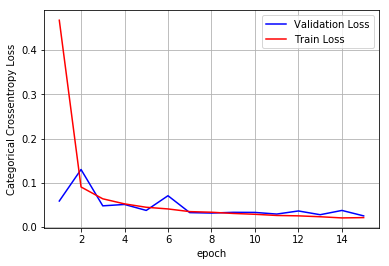

In [286]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [287]:
model_k_score = model_k.evaluate(x_test, y_test, verbose=0)
print('Test score:', model_k_score[0]) 
print('Test accuracy:', model_k_score[1])

Test score: 0.016375290652771945
Test accuracy: 0.9955


**4) ConvNet with 7*7 kernel, with more no. of convolution and max-pooling layers**

In [0]:
model_l = Sequential()

model_l.add(Conv2D(64, (7,7), activation='relu', input_shape=input_shape, padding='same'))
model_l.add(Conv2D(64, (7,7), activation='relu', padding='same'))
model_l.add(MaxPooling2D(pool_size=(2, 2)))

model_l.add(Conv2D(128, (7,7), activation='relu', padding='same'))
model_l.add(Conv2D(128, (7,7), activation='relu', padding='same'))
model_l.add(MaxPooling2D(pool_size=(2,2)))

model_l.add(Conv2D(256, (7,7), activation='relu', padding='same'))
model_l.add(Conv2D(256, (7,7), activation='relu', padding='same'))
model_l.add(MaxPooling2D(pool_size=(2,2)))

model_l.add(Flatten())
model_l.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_l.add(BatchNormalization())
model_l.add(Dropout(0.5))

model_l.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_l.add(BatchNormalization())
model_l.add(Dropout(0.5))

model_l.add(Dense(num_classes, activation='softmax'))

In [289]:
model_l.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_131 (Conv2D)          (None, 28, 28, 64)        3200      
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 28, 28, 64)        200768    
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 14, 14, 128)       401536    
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 14, 14, 128)       802944    
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 7, 7, 256)       

In [0]:
model_l.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [291]:
history = model_l.fit_generator(
    training_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    validation_data= cv_generator,
    validation_steps=x_cv.shape[0]//batch_size,
    epochs=epochs)

Epoch 1/15
375/375 [==============================] - 64s 172ms/step - loss: 0.9001 - acc: 0.7134 - val_loss: 1.4909 - val_acc: 0.5319
Epoch 2/15
375/375 [==============================] - 56s 150ms/step - loss: 0.1472 - acc: 0.9582 - val_loss: 0.1102 - val_acc: 0.9694
Epoch 3/15
375/375 [==============================] - 56s 151ms/step - loss: 0.0902 - acc: 0.9755 - val_loss: 0.0682 - val_acc: 0.9816
Epoch 4/15
375/375 [==============================] - 56s 150ms/step - loss: 0.0680 - acc: 0.9811 - val_loss: 0.1403 - val_acc: 0.9602
Epoch 5/15
375/375 [==============================] - 57s 151ms/step - loss: 0.0542 - acc: 0.9848 - val_loss: 0.0624 - val_acc: 0.9826
Epoch 6/15
375/375 [==============================] - 56s 150ms/step - loss: 0.0513 - acc: 0.9860 - val_loss: 0.0521 - val_acc: 0.9874
Epoch 7/15
375/375 [==============================] - 56s 149ms/step - loss: 0.0445 - acc: 0.9879 - val_loss: 0.0453 - val_acc: 0.9895
Epoch 8/15
375/375 [==============================] - 5

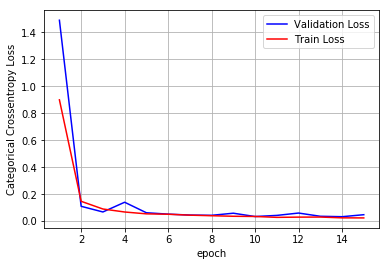

In [292]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [293]:
model_l_score = model_l.evaluate(x_test, y_test, verbose=0)
print('Test score:', model_l_score[0]) 
print('Test accuracy:', model_l_score[1])

Test score: 0.04445961678600434
Test accuracy: 0.9886


# **Summary**

In [294]:
from prettytable import PrettyTable

table = PrettyTable();

table.field_names = ['kerne Size','#C-C-P', 'DR in convolution', 'DR in Dense', 'Accuracy'];
table.add_row(['3*3', '2', 'No', 'No', model_a_score[1]])
table.add_row(['3*3', '2', 'Yes', 'Yes', model_b_score[1]])
table.add_row(['3*3', '2', 'No', 'Yes', model_c_score[1]])
table.add_row(['3*3', '3', 'No', 'Yes', model_d_score[1]])

table.add_row(['5*5', '2', 'No', 'No', model_e_score[1]])
table.add_row(['5*5', '2', 'Yes', 'Yes', model_f_score[1]])
table.add_row(['5*5', '2', 'No', 'Yes', model_g_score[1]])
table.add_row(['5*5', '3', 'No', 'Yes', model_h_score[1]])

table.add_row(['7*7', '2', 'No', 'No', model_i_score[1]])
table.add_row(['7*7', '2', 'Yes', 'Yes', model_j_score[1]])
table.add_row(['7*7', '2', 'No', 'Yes', model_k_score[1]])
table.add_row(['7*7', '3', 'No', 'Yes', model_l_score[1]])

print(table)

+------------+--------+-------------------+-------------+----------+
| kerne Size | #C-C-P | DR in convolution | DR in Dense | Accuracy |
+------------+--------+-------------------+-------------+----------+
|    3*3     |   2    |         No        |      No     |  0.9936  |
|    3*3     |   2    |        Yes        |     Yes     |  0.9951  |
|    3*3     |   2    |         No        |     Yes     |  0.9948  |
|    3*3     |   3    |         No        |     Yes     |  0.9935  |
|    5*5     |   2    |         No        |      No     |  0.9937  |
|    5*5     |   2    |        Yes        |     Yes     |  0.9943  |
|    5*5     |   2    |         No        |     Yes     |  0.9967  |
|    5*5     |   3    |         No        |     Yes     |  0.9891  |
|    7*7     |   2    |         No        |      No     |  0.9943  |
|    7*7     |   2    |        Yes        |     Yes     |  0.9933  |
|    7*7     |   2    |         No        |     Yes     |  0.9955  |
|    7*7     |   3    |         No

# **Observations**


1.   All the architectures are inspired from VGG, hence using C-C-P kind of layers
2.   Architectures having 2, C-C-P layers are performing better than one having 3 layers.
3. Adding Dropout is giving better results then architecture without dropout
4. Architecture that have dropout only in dense layer are performing btter than architectures that have dropout in both convolution and dense layers.
5. Architecture having kernels of size 5 * 5 is performing best as compare to architectures having kernel size 3 * 3 or 7 * 7
6. Architecture with kernel size 5 * 5, 2 C-C-P layers, dropout only in dense layers giving the best accuracy among all other architectures.



